In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=int(1e2), noise=0.05, random_state=0)

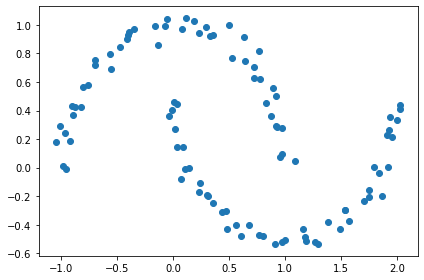

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

# DBSCAN on CPU

In [7]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=2)

In [8]:
%%time
y_db = db.fit_predict(X)

CPU times: user 2.38 ms, sys: 0 ns, total: 2.38 ms
Wall time: 3.93 ms


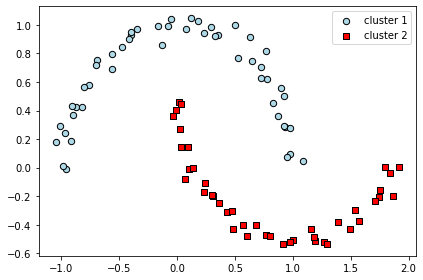

In [9]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

# DBSCAN with Rapids on GPU

In [11]:
!nvidia-smi

Mon Jul 20 09:54:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import pandas as pd
import cudf

X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gpu = cudf.DataFrame.from_pandas(X_df)

In [ ]:
from cuml import DBSCAN as cumlDBSCAN

db_gpu = cumlDBSCAN(eps=0.2, min_samples=2)

In [ ]:
%%time
y_db_gpu = db_gpu.fit_predict(X_gpu)

In [ ]:
plt.scatter(X[y_db_gpu == 0, 0], X[y_db_gpu == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db_gpu == 1, 0], X[y_db_gpu == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

# cuML GPU vs Sckit CPU

In [ ]:
import numpy as np

n_rows, n_cols = 10000, 100
X = np.random.rand(n_rows, n_cols)
print(X.shape)

X_df = pd.DataFrame({'fea%d'%i: X[:, i] for i in range(X.shape[1])})
X_gpu = cudf.DataFrame.from_pandas(X_df)

db = DBSCAN(eps=3, min_samples=2)
db_gpu = cumlDBSCAN(eps=3, min_samples=2)

%%time
y_db = db.fit_predict(X)

%%time
y_db_gpu = db_gpu.fit_predict(X_gpu)